# NY_crimes_process

### Import numpy, pandas, matpltlib.pyplot

In [1]:
# Import numpy, pandas, matpltlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

### Import the data

In [2]:
# Import the data
df = pd.read_csv('./NY_crimes/NYPD_Complaint_Data_Historic.csv')
df.head()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,724718389,09/04/2014,17:25:00,09/04/2014,17:35:00,81.0,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1005945.0,188862.0,NaN,NaN,NaN,NaN,40.685041,-73.921777,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
1,191133903,10/12/2016,07:40:00,10/12/2016,07:45:00,121.0,10/12/2016,109,GRAND LARCENY,417.0,"LARCENY,GRAND FROM PERSON,PURS",COMPLETED,FELONY,STATEN ISLAND,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,947034.0,171375.0,UNKNOWN,BLACK,U,NaN,40.636991,-74.134093,"(40.63699139, -74.134092508)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE HISPANIC,F
2,720151206,09/28/2012,13:30:00,09/28/2012,14:00:00,41.0,10/19/2012,109,GRAND LARCENY,413.0,"LARCENY,GRAND BY FALSE PROMISE",COMPLETED,FELONY,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1014179.0,239453.0,NaN,WHITE HISPANIC,M,NaN,40.823876,-73.891863,"(40.823876276, -73.891862968)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F
3,232242098,03/24/2015,15:45:00,NaN,NaN,46.0,03/24/2015,341,PETIT LARCENY,339.0,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1009041.0,247401.0,NaN,BLACK,M,NaN,40.845707,-73.910398,"(40.845707148, -73.910398033)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F
4,708078702,05/20/2017,04:02:00,05/20/2017,04:09:00,109.0,05/20/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1031779.0,217663.0,25-44,WHITE HISPANIC,M,NaN,40.763992,-73.828426,"(40.763991557, -73.828425559)",PATROL BORO QUEENS NORTH,NaN,25-44,BLACK,M


### Data Exploration & Data Modeling 

In [3]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [4]:
df.shape

(6983207, 35)

In [5]:
df.VIC_SEX.value_counts()

F    2733665
M    2288821
E    1119264
D     841146
U          4
Name: VIC_SEX, dtype: int64

In [6]:
df.VIC_SEX.value_counts()

F    2733665
M    2288821
E    1119264
D     841146
U          4
Name: VIC_SEX, dtype: int64

In [7]:
columns_remove = ['CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'HADEVELOPT', 'HOUSING_PSA', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'RPT_DT', 'STATION_NAME', 'TRANSIT_DISTRICT', 'X_COORD_CD','Y_COORD_CD', 'Lat_Lon']
df = df.drop(columns_remove, axis=1)

In [8]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

### Time

In [9]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
df.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

In [10]:
df['CMPLNT_FR_DT_TM'] = df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM']
df['CMPLNT_FR_DT_TM']

0          09/04/2014 17:25:00
1          10/12/2016 07:40:00
2          09/28/2012 13:30:00
3          03/24/2015 15:45:00
4          05/20/2017 04:02:00
                  ...         
6983202    09/12/2014 17:50:00
6983203    12/20/2012 13:30:00
6983204    04/04/2013 13:00:00
6983205    09/09/2015 13:00:00
6983206    08/19/2012 01:00:00
Name: CMPLNT_FR_DT_TM, Length: 6982505, dtype: object

In [11]:
df['CMPLNT_FR_DT_TM'] = pd.to_datetime(df['CMPLNT_FR_DT_TM'], infer_datetime_format=True,errors = 'coerce')

In [12]:
df['CMPLNT_FR_YEAR'] = df['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
df['CMPLNT_FR_MONTH'] = df['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[0]))
df['CMPLNT_FR_DAY'] = df['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[1]))
df['CMPLNT_FR_HOUR'] = df['CMPLNT_FR_TM'].map(lambda x: int(x.split(':')[0]))

In [13]:
df['CMPLNT_FR_YEAR']

0          2014
1          2016
2          2012
3          2015
4          2017
           ... 
6983202    2014
6983203    2012
6983204    2013
6983205    2015
6983206    2012
Name: CMPLNT_FR_YEAR, Length: 6982505, dtype: int64

In [14]:
df['CMPLNT_FR_MONTH']

0           9
1          10
2           9
3           3
4           5
           ..
6983202     9
6983203    12
6983204     4
6983205     9
6983206     8
Name: CMPLNT_FR_MONTH, Length: 6982505, dtype: int64

In [155]:
df.CMPLNT_FR_DAY

0           4
1          12
2          28
3          24
4          20
           ..
6983202    12
6983203    20
6983204     4
6983205     9
6983206    19
Name: CMPLNT_FR_DAY, Length: 6982505, dtype: int64

In [15]:
df['CMPLNT_FR_YEAR'].unique()

array([2014, 2016, 2012, 2015, 2017, 2011, 2007, 2006, 2013, 2018, 2010,
       2005, 2009, 2008, 1991, 1974, 2003, 2004, 1950, 1015, 2002, 1994,
       1985, 2001, 1978, 1993, 1967, 1027, 1989, 1992, 1999, 1990, 1995,
       2000, 1972, 1980, 1998, 1957, 1982, 1930, 1971, 1016, 1986, 1996,
       1997, 1979, 1913, 1987, 1916, 1017, 1915, 1976, 1910, 1975, 1988,
       1966, 1955, 1969, 1977, 1906, 1920, 1968, 1984, 1960, 1908, 1922,
       1940, 1900, 1981, 1965, 1905, 1970, 1929, 1983, 1911, 1909, 1962,
       1941, 1954, 1961, 1948, 1956, 1973, 1938, 1959, 1945, 1964, 1946,
       1919, 1026, 1019, 1029, 1928, 1918, 1018, 1028, 1951, 1912, 1025,
       2019, 1949, 1914, 1917, 1947, 1958, 1942], dtype=int64)

In [17]:
df['CMPLNT_FR_YEAR'].nunique()

106

In [18]:
l=list(df['CMPLNT_FR_YEAR'].unique())
a= df.shape[0]

In [19]:
for year in l :
    print('number of rows belong to the year ',year,' : ', df[df['CMPLNT_FR_YEAR']==year]['CMPLNT_FR_YEAR'].count())

number of rows belong to the year  2014  :  492316
number of rows belong to the year  2016  :  478765
number of rows belong to the year  2012  :  504945
number of rows belong to the year  2015  :  479009
number of rows belong to the year  2017  :  469070
number of rows belong to the year  2011  :  498818
number of rows belong to the year  2007  :  535424
number of rows belong to the year  2006  :  529126
number of rows belong to the year  2013  :  496063
number of rows belong to the year  2018  :  477513
number of rows belong to the year  2010  :  510328
number of rows belong to the year  2005  :  10806
number of rows belong to the year  2009  :  511217
number of rows belong to the year  2008  :  528907
number of rows belong to the year  1991  :  54
number of rows belong to the year  1974  :  19
number of rows belong to the year  2003  :  1624
number of rows belong to the year  2004  :  2175
number of rows belong to the year  1950  :  3
number of rows belong to the year  1015  :  9
num

In [20]:
df[df['CMPLNT_FR_YEAR']==2006].shape

(529126, 28)

In [21]:
df[df['CMPLNT_FR_YEAR']==2007].shape

(535424, 28)

In [22]:
df[df['CMPLNT_FR_YEAR']==2005].shape

(10806, 28)

In [23]:
df[df['CMPLNT_FR_YEAR']==2004].shape

(2175, 28)

In [24]:
df.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_TM,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR
0,724718389,09/04/2014,17:25:00,81.0,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,40.685041,-73.921777,PATROL BORO BKLYN NORTH,25-44,WHITE,F,2014-09-04 17:25:00,2014,9,4,17
1,191133903,10/12/2016,07:40:00,121.0,109,GRAND LARCENY,417.0,"LARCENY,GRAND FROM PERSON,PURS",COMPLETED,FELONY,STATEN ISLAND,STREET,N.Y. POLICE DEPT,0.0,UNKNOWN,BLACK,U,40.636991,-74.134093,PATROL BORO STATEN ISLAND,45-64,WHITE HISPANIC,F,2016-10-12 07:40:00,2016,10,12,7
2,720151206,09/28/2012,13:30:00,41.0,109,GRAND LARCENY,413.0,"LARCENY,GRAND BY FALSE PROMISE",COMPLETED,FELONY,BRONX,STREET,N.Y. POLICE DEPT,0.0,NaN,WHITE HISPANIC,M,40.823876,-73.891863,PATROL BORO BRONX,45-64,WHITE HISPANIC,F,2012-09-28 13:30:00,2012,9,28,13
3,232242098,03/24/2015,15:45:00,46.0,341,PETIT LARCENY,339.0,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,0.0,NaN,BLACK,M,40.845707,-73.910398,PATROL BORO BRONX,<18,WHITE HISPANIC,F,2015-03-24 15:45:00,2015,3,24,15
4,708078702,05/20/2017,04:02:00,109.0,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,0.0,25-44,WHITE HISPANIC,M,40.763992,-73.828426,PATROL BORO QUEENS NORTH,25-44,BLACK,M,2017-05-20 04:02:00,2017,5,20,4


In [25]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
df.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

### Gender

In [26]:
df.replace('UNKNOWN', np.NaN, inplace=True)
df.replace('E', np.NaN, inplace=True)
df.replace('D', np.NaN, inplace=True)
df.replace('U', np.NaN, inplace=True)

In [27]:
a=df.shape[0]

In [28]:
print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

df.dropna(axis=0, inplace=True)
print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))
print('percentage of data removed: ',(a-3546952)/a*100,'%')

Number of rows before removing rows with missing values: 6982505
Number of rows after removing rows with missing values: 1165335
percentage of data removed:  49.202299174866326 %


In [169]:
print('percentage of data removed: ',((6982505-a)/6982505)*100,'%')

percentage of data removed:  0.0 %


### we will start working from the year : 2006

In [29]:
df[df['CMPLNT_FR_YEAR']==2007].shape

(54257, 28)

In [30]:
df[df['CMPLNT_FR_YEAR']==2006].shape

(57673, 28)

In [31]:
df[df['CMPLNT_FR_YEAR']==2005].shape

(1236, 28)

In [32]:
df[df['CMPLNT_FR_YEAR']==2005].shape

(1236, 28)

In [33]:
df = df[df['CMPLNT_FR_YEAR'] > 2006]

In [34]:
df.shape

(1105025, 28)

In [35]:
df['CMPLNT_FR_YEAR'].unique()

array([2017, 2007, 2014, 2016, 2012, 2015, 2013, 2011, 2010, 2008, 2018,
       2009, 2019], dtype=int64)

In [36]:
df.shape

(1105025, 28)

### Data Visualization

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline
sns.set_style("whitegrid")

#### 1/ Victim/Susp Correlation

In [107]:
cross_table = df.groupby(['SUSP_RACE', 'VIC_RACE'])['OFNS_DESC'].count()

In [108]:
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)

<AxesSubplot:xlabel='SUSP_RACE', ylabel='VIC_RACE'>

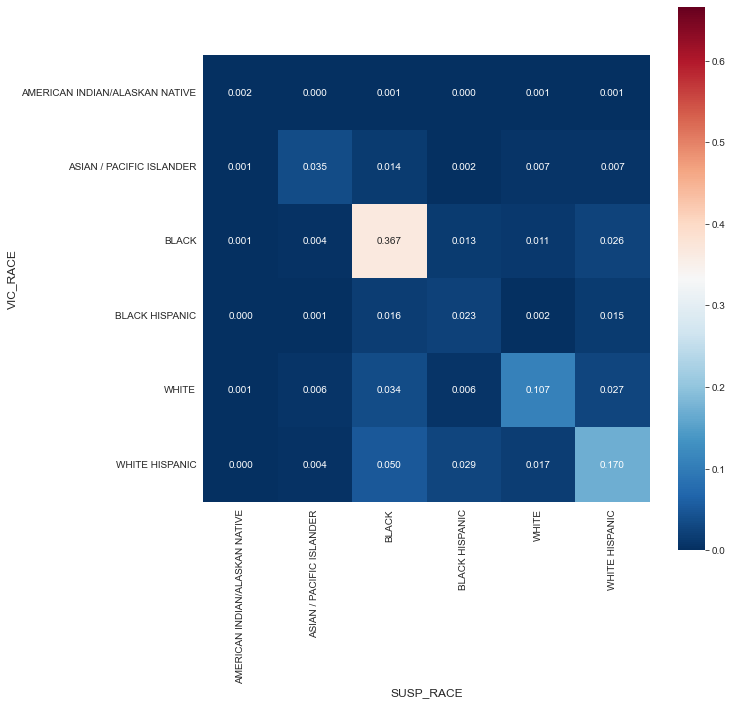

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(cross_table, cmap='RdBu_r', ax=ax,square=True,vmin=0, vmax=0.666,annot=True,fmt='.3f',)

#### 2/ Crimes per Year

<AxesSubplot:xlabel='CMPLNT_FR_YEAR', ylabel='count'>

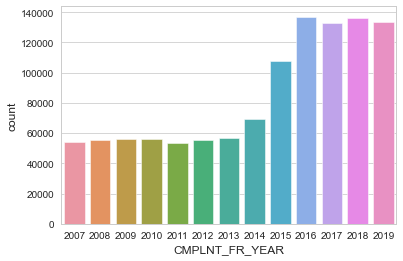

In [180]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df)

In [111]:
pd.unique(df.LAW_CAT_CD)

array(['MISDEMEANOR', 'FELONY', 'VIOLATION'], dtype=object)

#### 3/ Felonies per Year

<AxesSubplot:xlabel='CMPLNT_FR_YEAR', ylabel='count'>

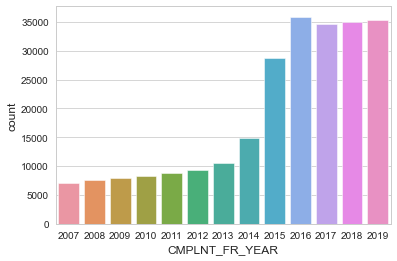

In [113]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'FELONY'])

#### 4/ Violations per Year

<AxesSubplot:xlabel='CMPLNT_FR_YEAR', ylabel='count'>

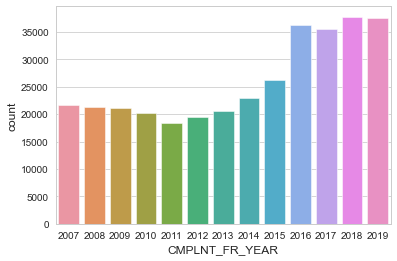

In [112]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'VIOLATION'])

#### 5/ Misdemeanors per Year

<AxesSubplot:xlabel='CMPLNT_FR_YEAR', ylabel='count'>

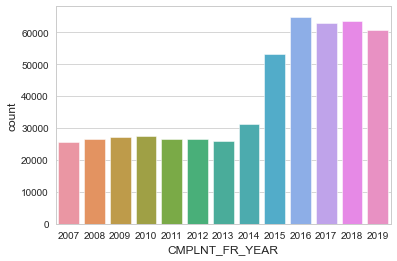

In [114]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'MISDEMEANOR'])

#### 6/ Correlation from year 2017 (for more recent information) 

In [115]:
df = df[df['CMPLNT_FR_YEAR'] > 2017]

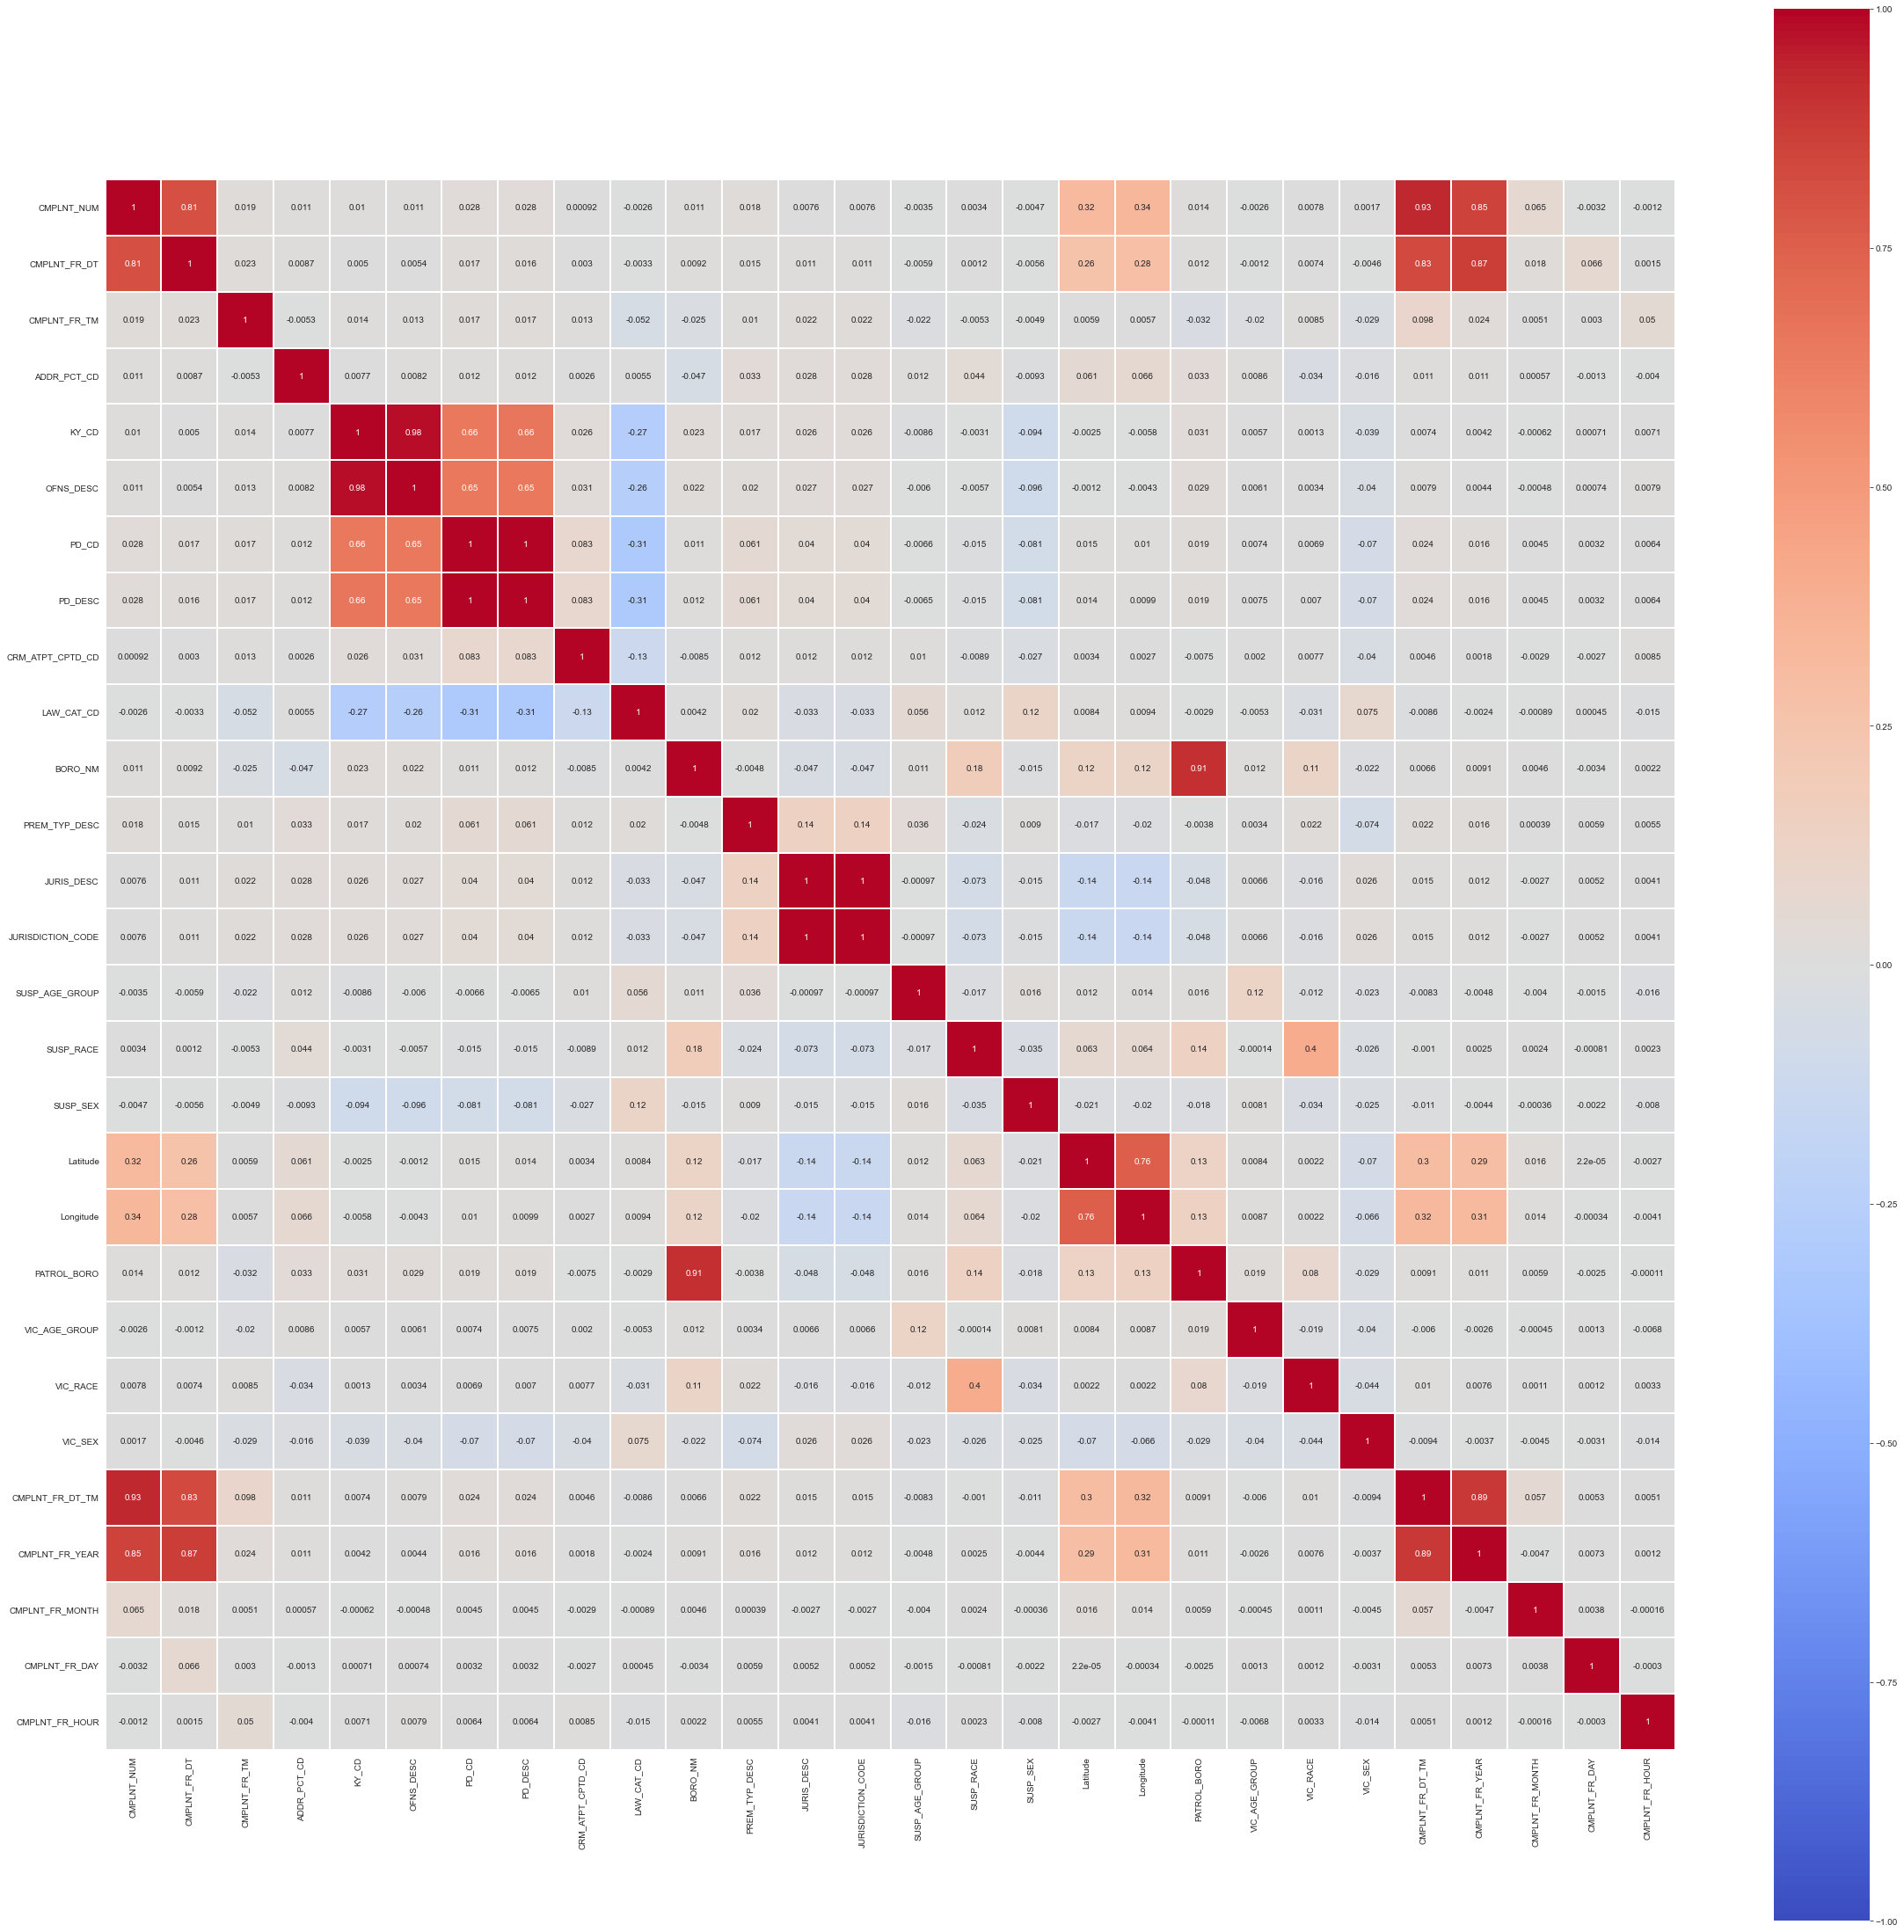

In [116]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize = (40,40))
sns_plot = sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white", annot=True,vmin=-1, vmax=1, center=0, square=True)
plt.savefig("corr.png")

#### 7/ Plotting crime rates per borough

Text(0.5, 1.0, 'Crime Rate in NYC (per Borough)')

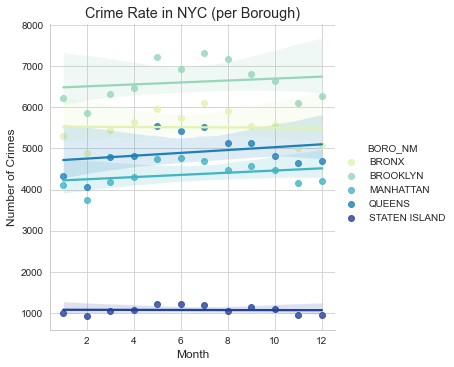

In [122]:
# plotting crime rates per borough
df_borough = df.groupby(['CMPLNT_FR_MONTH','BORO_NM'])[['CMPLNT_NUM']].count().reset_index()

g = sns.lmplot(x='CMPLNT_FR_MONTH',y='CMPLNT_NUM',data=df_borough, hue='BORO_NM', palette='YlGnBu')
g = (g.set_axis_labels("Month","Number of Crimes"));
plt.title("Crime Rate in NYC (per Borough)")


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

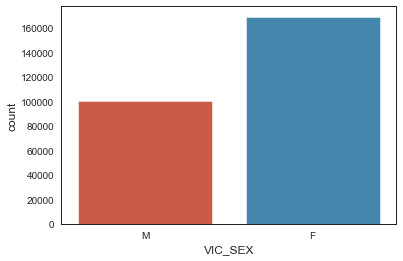

In [129]:
sns.countplot(df['VIC_SEX'])

### Data Modeling 

In [39]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'CMPLNT_FR_DT_TM', 'CMPLNT_FR_YEAR', 'CMPLNT_FR_MONTH', 'CMPLNT_FR_DAY',
       'CMPLNT_FR_HOUR'],
      dtype='object')

In [40]:
df1 = df.copy()

In [41]:
columns_remove = ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX','CMPLNT_FR_DT_TM',
       'PATROL_BORO', 'VIC_RACE',]
df = df.drop(columns_remove, axis=1)

In [42]:
df

,KY_CD,Latitude,Longitude,VIC_AGE_GROUP,VIC_SEX,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR
4,344,40.763992,-73.828426,25-44,M,2017,5,20,4
9,116,40.697964,-73.918083,<18,F,2007,10,16,2
15,351,40.788845,-73.946176,25-44,F,2014,12,4,0
18,109,40.689272,-73.820396,45-64,M,2017,6,4,10
19,578,40.624674,-74.027588,65+,M,2016,9,27,1
...,...,...,...,...,...,...,...,...,...
6983183,126,40.854317,-73.930084,25-44,F,2014,5,6,10
6983191,107,40.827520,-73.877013,18-24,F,2011,3,13,0
6983192,106,40.883127,-73.861374,45-64,M,2015,5,26,0
6983196,106,40.810920,-73.945045,<18,F,2017,7,11,2


In [43]:
def ky_cat(ky_cd):
    if ky_cd in [101,102,103]:
        return "killing crimes"
    elif ky_cd in [104,115,116,233,234,356,460]:
        return "sexual crimes"
    elif ky_cd in [105,107,109,110,111,112,113,231,238,340,341,342,343,358]:
        return "thift"
    elif ky_cd in [106,114,124,344]:
        return "other types of violent"
    elif ky_cd in [117,118,119,232,235,236,346,347,577]:
        return "drugs"
    elif ky_cd in [120, 121, 125, 126, 345, 345, 348, 349, 351, 352, 353, 354, 355, 357, 359, 360, 361, 362, 363, 364, 364, 364, 365, 366, 455, 571, 572, 578, 672, 675, 676, 677, 677, 678, 685, 881] :
        return "other"
df['KY_CD'] = df['KY_CD'].map(lambda x: ky_cat(x))

In [44]:
df.head()

,KY_CD,Latitude,Longitude,VIC_AGE_GROUP,VIC_SEX,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR
4,other types of violent,40.763992,-73.828426,25-44,M,2017,5,20,4
9,sexual crimes,40.697964,-73.918083,<18,F,2007,10,16,2
15,other,40.788845,-73.946176,25-44,F,2014,12,4,0
18,thift,40.689272,-73.820396,45-64,M,2017,6,4,10
19,other,40.624674,-74.027588,65+,M,2016,9,27,1


In [46]:
dum_df = pd.get_dummies(df, columns=["KY_CD","VIC_SEX"],
                        prefix=["KY_CD","VIC_SEX"] )

In [47]:
dum_df

,Latitude,Longitude,VIC_AGE_GROUP,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR,KY_CD_drugs,KY_CD_killing crimes,KY_CD_other,KY_CD_other types of violent,KY_CD_sexual crimes,KY_CD_thift,VIC_SEX_F,VIC_SEX_M
4,40.763992,-73.828426,25-44,2017,5,20,4,0,0,0,1,0,0,0,1
9,40.697964,-73.918083,<18,2007,10,16,2,0,0,0,0,1,0,1,0
15,40.788845,-73.946176,25-44,2014,12,4,0,0,0,1,0,0,0,1,0
18,40.689272,-73.820396,45-64,2017,6,4,10,0,0,0,0,0,1,0,1
19,40.624674,-74.027588,65+,2016,9,27,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983183,40.854317,-73.930084,25-44,2014,5,6,10,0,0,1,0,0,0,1,0
6983191,40.827520,-73.877013,18-24,2011,3,13,0,0,0,0,0,0,1,1,0
6983192,40.883127,-73.861374,45-64,2015,5,26,0,0,0,0,1,0,0,0,1
6983196,40.810920,-73.945045,<18,2017,7,11,2,0,0,0,1,0,0,1,0


In [48]:
dum_df['VIC_AGE_GROUP'].nunique()

68

In [49]:
dum_df['VIC_AGE_GROUP'] = dum_df['VIC_AGE_GROUP'].apply(lambda x: 0 if x=='<=24' else (1 if x=='25-64' else 2))
dum_df['VIC_AGE_GROUP']

4          2
9          2
15         2
18         2
19         2
          ..
6983183    2
6983191    2
6983192    2
6983196    2
6983198    2
Name: VIC_AGE_GROUP, Length: 1105025, dtype: int64

In [50]:
dum_df

,Latitude,Longitude,VIC_AGE_GROUP,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR,KY_CD_drugs,KY_CD_killing crimes,KY_CD_other,KY_CD_other types of violent,KY_CD_sexual crimes,KY_CD_thift,VIC_SEX_F,VIC_SEX_M
4,40.763992,-73.828426,2,2017,5,20,4,0,0,0,1,0,0,0,1
9,40.697964,-73.918083,2,2007,10,16,2,0,0,0,0,1,0,1,0
15,40.788845,-73.946176,2,2014,12,4,0,0,0,1,0,0,0,1,0
18,40.689272,-73.820396,2,2017,6,4,10,0,0,0,0,0,1,0,1
19,40.624674,-74.027588,2,2016,9,27,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983183,40.854317,-73.930084,2,2014,5,6,10,0,0,1,0,0,0,1,0
6983191,40.827520,-73.877013,2,2011,3,13,0,0,0,0,0,0,1,1,0
6983192,40.883127,-73.861374,2,2015,5,26,0,0,0,0,1,0,0,0,1
6983196,40.810920,-73.945045,2,2017,7,11,2,0,0,0,1,0,0,1,0


In [51]:
dum_df.columns

Index(['Latitude', 'Longitude', 'VIC_AGE_GROUP', 'CMPLNT_FR_YEAR',
       'CMPLNT_FR_MONTH', 'CMPLNT_FR_DAY', 'CMPLNT_FR_HOUR', 'KY_CD_drugs',
       'KY_CD_killing crimes', 'KY_CD_other', 'KY_CD_other types of violent',
       'KY_CD_sexual crimes', 'KY_CD_thift', 'VIC_SEX_F', 'VIC_SEX_M'],
      dtype='object')

In [52]:
df2=dum_df.copy()

In [54]:
df2.head()

,Latitude,Longitude,VIC_AGE_GROUP,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR,KY_CD_drugs,KY_CD_killing crimes,KY_CD_other,KY_CD_other types of violent,KY_CD_sexual crimes,KY_CD_thift,VIC_SEX_F,VIC_SEX_M
4,40.763992,-73.828426,2,2017,5,20,4,0,0,0,1,0,0,0,1
9,40.697964,-73.918083,2,2007,10,16,2,0,0,0,0,1,0,1,0
15,40.788845,-73.946176,2,2014,12,4,0,0,0,1,0,0,0,1,0
18,40.689272,-73.820396,2,2017,6,4,10,0,0,0,0,0,1,0,1
19,40.624674,-74.027588,2,2016,9,27,1,0,0,1,0,0,0,0,1


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105025 entries, 4 to 6983198
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Latitude                      1105025 non-null  float64
 1   Longitude                     1105025 non-null  float64
 2   VIC_AGE_GROUP                 1105025 non-null  int64  
 3   CMPLNT_FR_YEAR                1105025 non-null  int64  
 4   CMPLNT_FR_MONTH               1105025 non-null  int64  
 5   CMPLNT_FR_DAY                 1105025 non-null  int64  
 6   CMPLNT_FR_HOUR                1105025 non-null  int64  
 7   KY_CD_drugs                   1105025 non-null  uint8  
 8   KY_CD_killing crimes          1105025 non-null  uint8  
 9   KY_CD_other                   1105025 non-null  uint8  
 10  KY_CD_other types of violent  1105025 non-null  uint8  
 11  KY_CD_sexual crimes           1105025 non-null  uint8  
 12  KY_CD_thift                 

In [57]:
# Get the feature vector
X = df2.drop(['KY_CD_killing crimes', 'KY_CD_other', 'KY_CD_other types of violent',
       'KY_CD_sexual crimes', 'KY_CD_thift','KY_CD_drugs'], axis = 1)

# Get the target vector
y = df2[['KY_CD_killing crimes', 'KY_CD_other', 'KY_CD_other types of violent',
       'KY_CD_sexual crimes', 'KY_CD_thift','KY_CD_drugs']]

print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))

X shape: (1105025, 9)
y shape: (1105025, 6)


In [ ]:
import tensorflow

In [60]:
from tensorflow.keras.layers import Dense, Dropout

In [61]:
from tensorflow.keras.preprocessing import sequence

In [62]:
from tensorflow.keras.models import Sequential

In [63]:
from tensorflow.keras.layers import Dense, BatchNormalization

In [64]:
LR = 0.0001

In [65]:
X_train.shape

(994522, 9)

In [ ]:
df

In [124]:
# Create model
model = Sequential()
model.add(Dense(500, input_dim=9, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model to training data
model.fit(X_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
3885/3885 [==============================] - 39s 10ms/step - loss: 1.4604 - accuracy: 0.5488
Epoch 2/10
3885/3885 [==============================] - 42s 11ms/step - loss: 1.0279 - accuracy: 0.5752
Epoch 3/10
3885/3885 [==============================] - 43s 11ms/step - loss: 1.0207 - accuracy: 0.5753
Epoch 4/10
3885/3885 [==============================] - 39s 10ms/step - loss: 1.0159 - accuracy: 0.5762
Epoch 5/10
3885/3885 [==============================] - 39s 10ms/step - loss: 1.0127 - accuracy: 0.5773
Epoch 6/10
3885/3885 [==============================] - 40s 10ms/step - loss: 1.0118 - accuracy: 0.5774
Epoch 7/10
3885/3885 [==============================] - 41s 11ms/step - loss: 1.0107 - accuracy: 0.5775
Epoch 8/10
3885/3885 [==============================] - 42s 11ms/step - loss: 1.0101 - accuracy: 0.5775
Epoch 9/10
3885/3885 [==============================] - 41s 11ms/step - loss: 1.0099 - accuracy: 0.5778
Epoch 10/10
3885/3885 [==============================] - 40s 10m

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               5000      
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 390       
Total params: 368,954
Trainable params: 368,954
Non-trainable params: 0
_________________________________________________________________


In [107]:
y_pred= model.predict(X_valid)

In [100]:
# Evaluate model on test data
scores = model.evaluate(X_valid, y_valid)
print("\n%s: %.14f%%" % (model.metrics_names[1], scores[1]*100))

3454/3454 [==============================] - ETA: 0s - loss: 1.0566 - accuracy: 0.54 - 5s 2ms/step - loss: 1.0565 - accuracy: 0.5489

accuracy: 54.89081740379333%


### Save the model

In [69]:
model.save('model2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model2\assets
